In [271]:
import numpy as np
from PIL import Image
import cv2
import math
import matplotlib.pyplot as plt

In [272]:
g = plt.imread("krishna_0_001.png")
#arr = np.array(img)

In [273]:
f = plt.imread("krishna.png")

In [274]:
f_hat=np.zeros(f.shape)

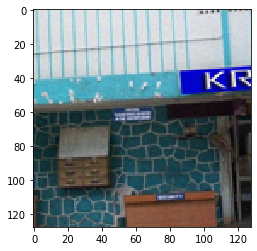

In [275]:
plt.imshow(g)

In [276]:
f.shape

(128, 128, 3)

In [133]:
#plt.imshow(B)

In [132]:
#plt.imshow(G)

In [131]:
#plt.imshow(R)

In [128]:
#img[:,:,0] #1st channel of image

In [129]:
#img[:,:,1] #second channel of image

In [130]:
#img[:,:,2] #3rd channel of image

In [191]:
def conv(X, H):
    # make sure both X and H are 2-D
    assert( X.ndim == 2)
    assert( H.ndim == 2)
    
    # get the horizontal and vertical size of X and H
    imageColumns = X.shape[1]
    imageRows = X.shape[0]
    kernelColumns = H.shape[1]
    kernelRows = H.shape[0]

    # calculate the horizontal and vertical size of Y (assume "full" convolution)
    newRows = imageRows + kernelRows - 1
    newColumns = imageColumns + kernelColumns - 1

    # create an empty output array
    Y = np.zeros((newRows,newColumns))


    # go over output locations
    for m in range(newRows):
        for n in range(newColumns):

    # go over input locations
          for i in range(kernelRows):
              for j in range(kernelColumns):
                if (m-i >= 0) and (m-i < imageRows ) and (n-j >= 0) and (n-j < imageColumns):
                      Y[m,n] = Y[m,n] + H[i,j]*X[m-i,n-j]
        # make sure kernel is within bounds

        # calculate the convolution sum

    return Y


In [192]:
"********creating Gaussian kernel with given sigma**************"
#********creating Gaussian kernel with given sigma**************"
def GaussianKernal(sigma):
    #s = 7 #6*sigma + 1
    filter_size = 7 #math.ceil(s)
   # b = filter_size%2
   # if b == 0:
        #filter_size = filter_size+1 #Make odd size kernel
    h = np.zeros([filter_size, filter_size], dtype = float)
    m = filter_size//2
    n = filter_size//2
    sum = 0
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            if sigma == 0.0:
                x1 = 1
                sigma = 1
            else:
                x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            h[x+m, y+n] = (1/x1)*x2
            sum = sum+h[x+m,y+n]
    print(sum)
    h = h/sum
    
    return h

In [315]:
"Calling Gaussian kernel with different Sigma values"
def Gaussian_filter(g,sigma):
    h = GaussianKernal(sigma)
    plt.imshow(h)
    (B, G, R) = cv2.split(g)
    s1 = conv(B,h)
    s2 = conv(G,h)
    s3 = conv(R,h)
    merged = cv2.merge([s1, s2, s3])
    return merged


1.028974437023155


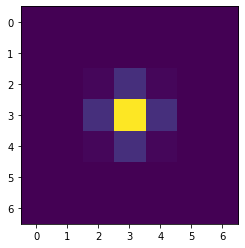

In [319]:
img = Gaussian_filter(g,0.5)

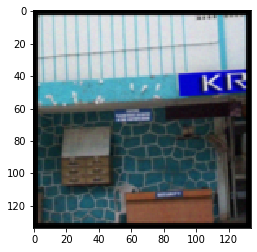

In [320]:
plt.imshow(img)

In [313]:
#NLM filter
def NLM(Wsim,W,sigNLM,g):
    w,h,c=g.shape 
    g_pad=np.pad(g,((Wsim+W,Wsim+W), (Wsim+W,Wsim+W),(0,0)), 'constant',constant_values=(0, 0))
    print(g_pad.shape)
    for i in range(Wsim+W,w+Wsim+W):
        for j in range(Wsim+W,h+Wsim+W):
            Np = g_pad[i-Wsim:i+Wsim+1,j-Wsim:j+Wsim+1,:]
            Vp = Np.flatten()

            X=np.zeros((2*W+1,2*W+1))
            
            for k in range(-W,W+1):
                for l in range(-W,W+1):
                    Nq=g_pad[i+k-Wsim:i+k+Wsim+1,j+l-Wsim:j+l+Wsim+1,:]
                    Vq=Nq.flatten()
                    X[k+W,l+W] = np.exp(-np.dot(Vp-Vq,Vp-Vq)/(sigNLM*sigNLM))

            X=X/sum(sum(X))
            if((i==31+Wsim+W)):
                if((j==46+Wsim+W)):
                    print(X.shape)
                    print(X[:,5])
                    plt.imshow(X,interpolation='None')
                    plt.show()
                    #plt.imshow(g[i-W:i+W+1,j-W:j+W+1])
                    #plt.show()
            X=X.flatten()

            NpWR = g_pad[i-W:i+W+1,j-W:j+W+1,0]
            VpWR = NpWR.flatten()

            NpWG = g_pad[i-W:i+W+1,j-W:j+W+1,1]
            VpWG = NpWG.flatten()

            NpWB = g_pad[i-W:i+W+1,j-W:j+W+1,2]
            VpWB = NpWB.flatten()

            f_hat[i-Wsim-W,j-Wsim-W,0]=np.dot(VpWR,X);
            f_hat[i-Wsim-W,j-Wsim-W,1]=np.dot(VpWG,X);
            f_hat[i-Wsim-W,j-Wsim-W,2]=np.dot(VpWB,X);

    print(f_hat.shape)
    #print(f_new.shape)

    MSE=np.dot((f-f_hat).flatten(),(f-f_hat).flatten())

    PSNR=10*np.log10(1/MSE)

    #print(MSE,PSNR)

    #plt.imshow(f_hat)
    return f_hat, MSE, PSNR

(144, 144, 3)
(11, 11)
[6.90310716e-02 9.64073139e-02 9.77268992e-02 1.03550794e-01
 1.13316120e-01 1.33452990e-01 1.12905601e-01 1.02517688e-01
 9.38675402e-02 4.18183026e-02 1.00749667e-04]


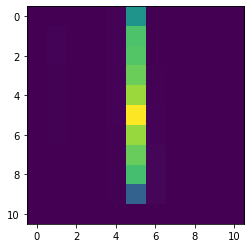

(128, 128, 3)
(144, 144, 3)
(11, 11)
[0.0678592  0.08557533 0.08638705 0.0899304  0.09573833 0.10725483
 0.09549734 0.08930638 0.08400339 0.04791189 0.00072829]


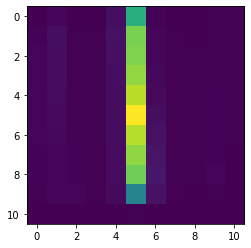

(128, 128, 3)
(144, 144, 3)
(11, 11)
[0.05723885 0.06787406 0.06834648 0.07039509 0.07370736 0.08012241
 0.073571   0.07003588 0.06695581 0.04432315 0.00204576]


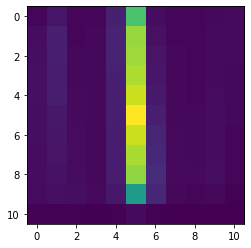

(128, 128, 3)
(144, 144, 3)
(11, 11)
[0.04504297 0.05132077 0.05159404 0.05277394 0.05466482 0.05827156
 0.05458738 0.05256765 0.05078835 0.03703365 0.00351473]


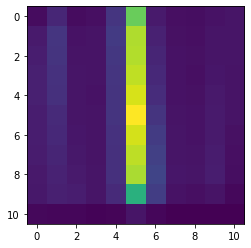

(128, 128, 3)
(144, 144, 3)
(11, 11)
[0.03540847 0.03925369 0.03941874 0.04012932 0.04126116 0.04339767
 0.04121497 0.04000532 0.03893157 0.0303335  0.00471911]


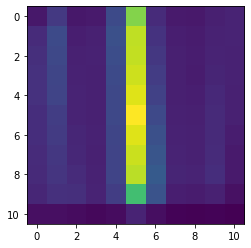

(128, 128, 3)
(144, 144, 3)
(11, 11)
[0.02863339 0.03112714 0.03123311 0.03168838 0.03241041 0.03376321
 0.03238102 0.03160904 0.03092007 0.02526116 0.00559658]


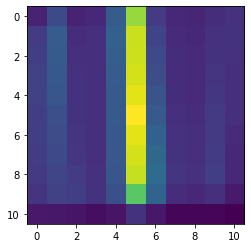

(128, 128, 3)


In [296]:
baselineMSE=np.dot((f-g).flatten(),(f-g).flatten())
baselinePSNR=10*np.log10(1/baselineMSE)

Wsim=3; W=5; sigNLM=0.1;

msevals=[]
psnrvals=[]

for sigNLM in range(5,11):
    f_hat,MSE,PSNR=NLM(Wsim,W,sigNLM/10.0,g)
    msevals.append(MSE)
    psnrvals.append(PSNR)

(144, 144, 3)
(11, 11)
[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 7.68705332e-161 1.00000000e+000 1.21321719e-202 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000]


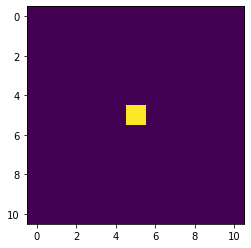

(128, 128, 3)


In [312]:
#Drawing filter
Wsim = 3; W = 5; sigNLM = 0.5
f_hat,MSE,PSNR=NLM(Wsim,W,sigNLM/10.0,g)

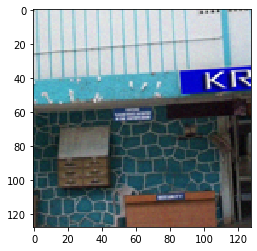

In [321]:
plt.imshow(f_hat)

(144, 144, 3)
(11, 11)
[2.35304763e-029 7.55383492e-015 2.94158313e-014 9.60533401e-012
 7.87660131e-008 9.99999866e-001 5.47920952e-008 3.52411159e-012
 5.23254492e-016 4.01614445e-051 6.18772698e-313]


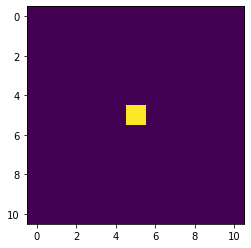

(128, 128, 3)


In [314]:
#Drawing filter
Wsim = 3; W = 5; sigNLM = 0.5
f_hat,MSE,PSNR=NLM(Wsim,W,sigNLM/10.0,g)

In [287]:
msevals2=[]
psnrvals2=[]
W=3
for sigNLM in range(5,11):
    f_hat,MSE,PSNR=NLM(Wsim,W,sigNLM/10.0,g)
    msevals2.append(MSE)
    psnrvals2.append(PSNR)

(140, 140, 3)
(7, 7)
(128, 128, 3)
(140, 140, 3)
(7, 7)
(128, 128, 3)
(140, 140, 3)
(7, 7)
(128, 128, 3)
(140, 140, 3)
(7, 7)
(128, 128, 3)
(140, 140, 3)
(7, 7)
(128, 128, 3)
(140, 140, 3)
(7, 7)
(128, 128, 3)


In [253]:
msevals2

[2137.7896752034094,
 2101.577320548664,
 2063.3254243494266,
 2028.3631588088647,
 1998.4690706120891,
 1973.0285289598671]

In [252]:
psnrvals2

[-33.29964975245177,
 -33.225453730566045,
 -33.145677295986864,
 -33.07145713850141,
 -33.006974312719095,
 -32.951333649684955]

In [231]:
msevals3=[]
psnrvals3=[]

for s in range(1,11):
    sigma=s/10.0
    f_hat=Gaussian_filter(g,sigma)
    #print(f.shape)
    #print(f_hat.shape)
    f_new=np.pad(f,((3,3), (3,3),(0,0)), 'constant',constant_values=(0, 0))
    #g_new.shape
    MSE=np.dot((f_new-f_hat).flatten(),(f_new-f_hat).flatten())
    PSNR=10*np.log10(1/MSE)
    msevals3.append(MSE)
    psnrvals3.append(PSNR)

15.915494309189533
3.9789328890457694
1.79583976591538
1.1772350624638692
1.028974437023155
1.0032829881506502
1.0002518719730031
1.0000056088362361
0.9999090297814746
0.9994587918263365


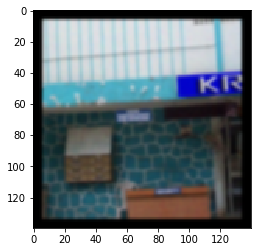

In [219]:
plt.imshow(f_hat)

In [146]:
psnrvals

[-12.281325795646687,
 -15.17502446605295,
 -17.318641605586528,
 -18.827688909445197,
 -19.875479486590976,
 -20.627604762298418]

In [290]:
def plots():
    plt.plot(np.array(range(5,11))/10.0,[baselinePSNR for x in range(6)])
    plt.plot(np.array(range(5,11))/10.0,psnrvals)
    plt.plot(np.array(range(5,11))/10.0,psnrvals2) 
    plt.plot(np.array(range(5,11))/10.0,psnrvals,'go')
    plt.plot(np.array(range(5,11))/10.0,psnrvals2,'ro')
    plt.xlabel(u'$\sigma_{NLM}$')
    plt.ylabel("PSNR")
    plt.title(u'Plot of PSNR v/s $\sigma_{NLM}$')
    plt.legend(['baseline','W=5,Wsim=3','W=3,Wsim=3'])

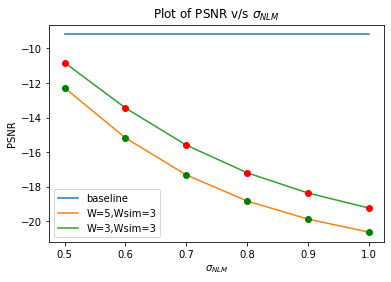

In [291]:
plots()

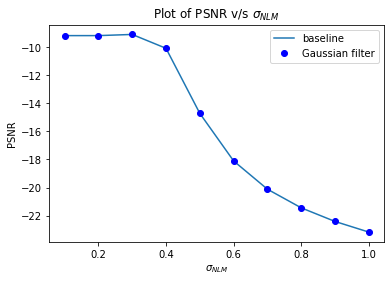

In [292]:
plt.plot(np.array(range(1,11))/10.0,psnrvals3)
plt.plot(np.array(range(1,11))/10.0,psnrvals3,'bo')
plt.xlabel(u'$\sigma_{NLM}$')
plt.ylabel("PSNR")
plt.title(u'Plot of PSNR v/s $\sigma_{NLM}$')
plt.legend(['baseline','Gaussian filter'])